In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import parser 
import reverser

In [2]:
# cuts = [1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]
# parser.cutting_routine(cuts)
# reverser.reverser_routine(cuts)

In [3]:
# Path to your file
file_path = "decays_PDG2016Plus_massorder_original.dat"
# file_path = "decays_QM2016Plus_massorder.dat"

# Parse the file
particles_df, decays_df = parser.parse_to_df(file_path)

stable_particles_test = particles_df[particles_df["Width (GeV)"] == 0.0]
stable_particles = stable_particles_test[stable_particles_test["No. of decay channels"] == 1]["ID"].tolist()
print(f"Number of stable particles: {len(stable_particles)}")
print(f"Stable particles IDs: {stable_particles}")

Number of stable particles: 26
Stable particles IDs: [3334, -3334, 3312, -3312, 3322, -3322, 3112, -3112, 3212, -3212, 3222, -3222, 3122, -3122, 2112, -2112, 2212, -2212, 311, -311, 321, -321, 211, -211, 111, 22]


In [4]:
# View the data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set display width
pd.set_option("display.max_colwidth", None)  # Set max column width

print("Particles DataFrame:")
print(particles_df.head(n=3))
print()
print(f"total number of particles : {len(particles_df)}")

print("\nDecays DataFrame:")
print(decays_df.head(n=3))
print()
print(f"total number of decays : {len(decays_df)}")


Particles DataFrame:
        ID          Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels
0  2001034  Delta(2950)-        2.95          0.5          16           1                0          0           0      1.5      -1                      2
1  2001033  Delta(2950)0        2.95          0.5          16           1                0          0           0      1.5       0                      3
2  2001032  Delta(2950)+        2.95          0.5          16           1                0          0           0      1.5       1                      3

total number of particles : 739

Decays DataFrame:
   ParentID  No. of daughter particles  BranchingRatio              ProductIDs
0   2001034                          2            0.96  [2001030, 22, 0, 0, 0]
1   2001034                          2            0.04   [2112, -211, 0, 0, 0]
2   2001033                          2            0.96  [2001029, 22, 0, 0

## TEST of dpg API

In [5]:
import pdg
from pdg_lib import *
api = pdg.connect()
print(api)
print(type(api))

2025 Review of Particle Physics, data release 2025-05-30 13:30:23 PDT, API version 0.2.0
S. Navas et al. (Particle Data Group), Phys. Rev. D 110, 030001 (2024) and 2025 update
(C) Particle Data Group (PDG), data released under CC BY 4.0
For further information see https://pdg.lbl.gov/api
<class 'pdg.api.PdgApi'>


In [ ]:
particle = api.get_particle_by_mcid(211)  # Example: get the particle with ID 211 (pi+)
mass = list(particle.masses())[0]
#width = list(particle.widths())[0]
lifetime = list(particle.lifetimes())[0]

svm = mass.summary_values()
#print(svm)
print(svm[0].get_error_positive(units="GeV"))

svl = lifetime.summary_values()
print(svl[0].get_error_positive(units="s"))


1.8200716040826e-07
5.29123572070991e-12


In [14]:
mass_errors_pos, mass_errors_neg = get_mass_errors(particles_df, api)
print(mass_errors_pos)
print(mass_errors_neg)

width_errors_pos, width_errors_neg = get_width_errors(particles_df, api)
print(width_errors_pos)
print(width_errors_neg)


mass_errors_pos = replace_nan_none(mass_errors_pos)
mass_errors_neg = replace_nan_none(mass_errors_neg)
width_errors_pos = replace_nan_none(width_errors_pos)
width_errors_neg = replace_nan_none(width_errors_neg)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0213005624897102, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.062, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.04, 0.04, 0.04, 0.04, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.04, 0.04, nan, nan, nan, nan, nan, nan, 0.01, 0.01, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

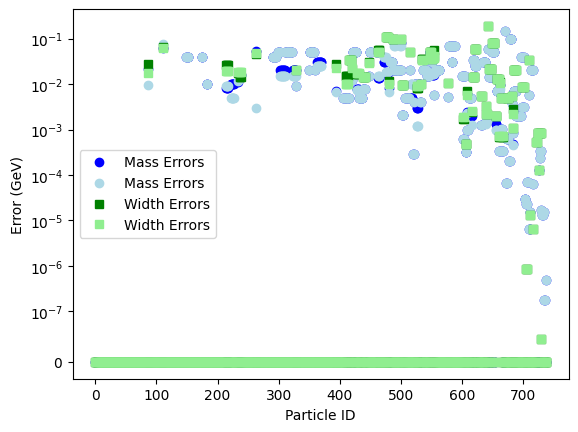

In [15]:
plt.plot(mass_errors_pos, label="Mass Errors", color='blue', linestyle='', marker='o')
plt.plot(mass_errors_neg, label="Mass Errors", color='lightblue', linestyle='', marker='o')
plt.plot(width_errors_pos, label="Width Errors", color='green', linestyle='', marker='s')
plt.plot(width_errors_neg, label="Width Errors", color='lightgreen', linestyle='', marker='s')
plt.xlabel("Particle ID")
plt.ylabel("Error (GeV)")
plt.yscale("symlog", linthresh=1e-7)
plt.legend()
plt.show()

In [ ]:
particles_df_errors = particles_df.copy()
particles_df_errors["Mass Error Pos (MeV)"] = mass_errors_df
particles_df_errors["Width Error (MeV)"] = width_errors_df

print(particles_df_errors.head(n=3))

        ID          Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels  Mass Error (MeV)  Width Error (MeV)
0  2001034  Delta(2950)-        2.95          0.5          16           1                0          0           0      1.5      -1                      2               0.0                0.0
1  2001033  Delta(2950)0        2.95          0.5          16           1                0          0           0      1.5       0                      3               0.0                0.0
2  2001032  Delta(2950)+        2.95          0.5          16           1                0          0           0      1.5       1                      3               0.0                0.0


In [10]:
# Save the DataFrame with errors to a pickle file
# particles_df_errors.to_pickle("Dataframes/particles_df_errors.pkl")

df = pd.read_pickle('Dataframes/particles_df_errors.pkl')
print(df.to_string())


          ID                Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels  Mass Error (MeV)  Width Error (MeV)
0    2001034        Delta(2950)-     2.95000     0.500000          16           1                0          0           0      1.5      -1                      2      0.000000e+00       0.000000e+00
1    2001033        Delta(2950)0     2.95000     0.500000          16           1                0          0           0      1.5       0                      3      0.000000e+00       0.000000e+00
2    2001032        Delta(2950)+     2.95000     0.500000          16           1                0          0           0      1.5       1                      3      0.000000e+00       0.000000e+00
3    2001031       Delta(2950)++     2.95000     0.500000          16           1                0          0           0      1.5       2                      2      0.000000e+00       0.000000e+00
4   -

In [11]:
# Output path
# output_path = f"test/decays_PDG2016Plus_massorder_{cut}.dat"

# parser.parse_to_dat(output_path, particles_df, decays_df)